In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Economic Freedom Data

### https://www.heritage.org/index/

In [29]:
df = pd.read_csv('economic_freedom_index2019_data.csv', encoding = 'latin-1')
df
# maybe gdp per world rank?
# IIRC there's also a happiness ranking so maybe correlate those 2 datasets?

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
5,6,Armenia,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,...,Armenia,3.0,$28.3,7.5,3.6,"$9,456",18.2,0.9,245.7,53.5
6,7,Australia,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,...,Australia,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
7,8,Austria,Austria,Europe,31.0,16.0,72.0,84.2,71.3,77.4,...,Austria,8.8,$439.6,2.9,1.3,"$49,869",5.5,2.2,"9,629.6",78.8
8,9,Azerbaijan,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,...,Azerbaijan,9.8,$171.8,0.1,1.2,"$17,492",5.0,13.0,"2,867.0",54.7
9,10,Bahamas,Bahamas,Americas,76.0,15.0,62.9,42.2,46.9,43.7,...,Bahamas,0.4,$11.6,1.3,-0.7,"$31,139",12.6,1.4,927.7,57.2


In [30]:
# WEBNAME is the same as Country Name with slight differences; so is Country
# CountryID is basically like index
data = df.drop(["WEBNAME", "CountryID", "Country Name"], axis = 1)

In [31]:
data

,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
5,Europe,47.0,24.0,67.7,57.2,46.3,38.6,84.7,79.0,53.0,...,Armenia,3.0,$28.3,7.5,3.6,"$9,456",18.2,0.9,245.7,53.5
6,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,...,Australia,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
7,Europe,31.0,16.0,72.0,84.2,71.3,77.4,50.5,24.5,85.5,...,Austria,8.8,$439.6,2.9,1.3,"$49,869",5.5,2.2,"9,629.6",78.8
8,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,89.4,...,Azerbaijan,9.8,$171.8,0.1,1.2,"$17,492",5.0,13.0,"2,867.0",54.7
9,Americas,76.0,15.0,62.9,42.2,46.9,43.7,97.3,86.8,65.7,...,Bahamas,0.4,$11.6,1.3,-0.7,"$31,139",12.6,1.4,927.7,57.2


# Data Cleaning 🧹

### As per usual... 

- Renaming columns
- Replace invalid values
- Dropping columns with NaN classifiers
- Converting all valid data to proper formats
- Blah, blah blah...

In [32]:
data.rename(columns={ 
    "2019 Score": "EFI Score 2019",
    "World Rank": "World EFI Rank",
    "Region Rank": "Regional EFI Rank",
    "Gov\'t Spending": "Govt Spending",
    "Gov't Expenditure % of GDP ": "Govt Expenditure % of GDP",
    "Investment Freedom ": "Investment Freedom"
}, inplace=True)

Reseach from the _Kashian Database of Economic Somethingitude_ asserts that `Government Integrity < 25` is considered **CORRUPT** while `> 30` is considered **NOBLE**. (CITATION: google.com/kash)

### Potential Example for Converting Numerical Data into Categorical Discrete Data!

In [33]:
data.columns.unique()

Index(['Region', 'World EFI Rank', 'Regional EFI Rank', 'EFI Score 2019',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Govt Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Govt Expenditure % of GDP', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [34]:
data.replace({ 
    '$40.0 (2015 est.)': '40.0',
    '38,000 ppl.': 0.038,
    '$6.1 CHF (2014 )': '6.1',
    '1,246.5 ': '1246.5',
    '$139,100 (2009 est.)': 139000,
    '$1,700 (2015 est.)': 1700,
    '2.1 (2016)': 2.1
    }, inplace=True
)

In [35]:
data = data.dropna(subset=["EFI Score 2019"])

In [36]:
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].str.strip('$').str.strip(' ').str.replace('[^\w\s]','').fillna(0).astype(float)
data['GDP per Capita (PPP)'] = data['GDP per Capita (PPP)'].str.strip('$').str.strip(' ').str.replace('[^\w\s]','').fillna(0).astype(float)
data['FDI Inflow (Millions)'] = data['FDI Inflow (Millions)'].str.replace('[^\w\s]','').fillna(0).astype(float)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [37]:
data['Property Rights'] = data['Property Rights'].fillna(0).astype(float)
data['Judical Effectiveness'] = data['Judical Effectiveness'].fillna(0).astype(float)
data['Government Integrity'] = data['Government Integrity'].fillna(0).astype(float)
data['Tax Burden'] = data['Tax Burden'].fillna(0).astype(float)
data['Govt Spending'] = data['Govt Spending'].fillna(0).astype(float)
data['Fiscal Health'] = data['Fiscal Health'].fillna(0).astype(float)
data['Business Freedom'] = data['Business Freedom'].fillna(0).astype(float)
data['Labor Freedom'] = data['Labor Freedom'].fillna(0).astype(float)
data['Monetary Freedom'] = data['Monetary Freedom'].fillna(0).astype(float)
data['Trade Freedom'] = data['Trade Freedom'].fillna(0).astype(float)
data['Investment Freedom'] = data['Investment Freedom'].fillna(0).astype(float)
data['Financial Freedom'] = data['Financial Freedom'].fillna(0).astype(float)
data['Financial Freedom'] = data['Financial Freedom'].fillna(0).astype(float)
data['Tariff Rate (%)'] = data['Tariff Rate (%)'].fillna(0).astype(float)
data['Income Tax Rate (%)'] = data['Income Tax Rate (%)'].fillna(0).astype(float)
data['Corporate Tax Rate (%)'] = data['Corporate Tax Rate (%)'].fillna(0).astype(float)
data['Tax Burden % of GDP'] = data['Tax Burden % of GDP'].fillna(0).astype(float)
data['Govt Expenditure % of GDP'] = data['Govt Expenditure % of GDP'].fillna(0).astype(float)
data['Population (Millions)'] = data['Population (Millions)'].fillna(0).astype(float)
data['GDP Growth Rate (%)'] = data['GDP Growth Rate (%)'].fillna(0).astype(float)
data['5 Year GDP Growth Rate (%)'] = data['5 Year GDP Growth Rate (%)'].fillna(0).astype(float)
data['Unemployment (%)'] = data['Unemployment (%)'].fillna(0).astype(float)
data['Inflation (%)'] = data['Inflation (%)'].fillna(0).astype(float)
data['Public Debt (% of GDP)'] = data['Public Debt (% of GDP)'].fillna(0).astype(float)

# data['Public Debt (% of GDP)'].unique()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

### What a nice, beautiful, clean dataset...

In [38]:
data.head()

,Region,World EFI Rank,Regional EFI Rank,EFI Score 2019,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,Afghanistan,35.5,696.0,2.5,2.9,1958.0,8.8,5.0,539.0,7.3
1,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,Albania,2.9,360.0,3.9,2.5,12507.0,13.9,2.0,11191.0,71.2
2,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,Algeria,41.5,6329.0,2.0,3.1,15237.0,10.0,5.6,12030.0,25.8
3,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,Angola,28.2,1903.0,0.7,2.9,6753.0,8.2,31.7,22545.0,65.3
4,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,Argentina,44.1,9202.0,2.9,0.7,20876.0,8.7,25.7,118570.0,52.6


# Sanity check

- Exploring data
- Plotting some known trends
- Plotting some expected trends
- Plotting some unknown trends 


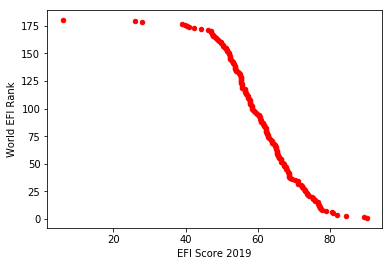

In [39]:
# Since World Ranking is based on EFI Score, these should be deeply correlated
data.plot.scatter(x="EFI Score 2019", y="World EFI Rank", c="red")


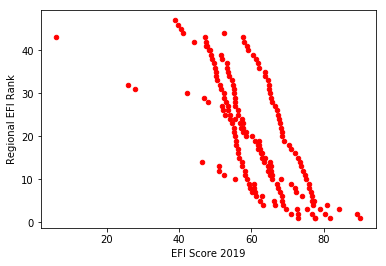

In [40]:
# Same here 
# you can even see the lines for each region
data.plot.scatter(x="EFI Score 2019", y="Regional EFI Rank", c="red")


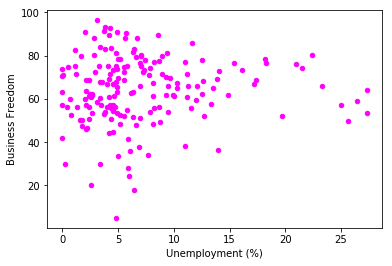

In [41]:
# We can see that lower unemployment is correlated with higher business freedom scores
data.plot.scatter(x="Unemployment (%)", y="Business Freedom", c="magenta")


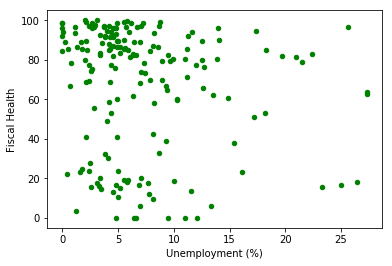

In [42]:
# It also seems that lower unemployment follows higher Fiscal Health scores
data.plot.scatter(x="Unemployment (%)", y="Fiscal Health", c="green")


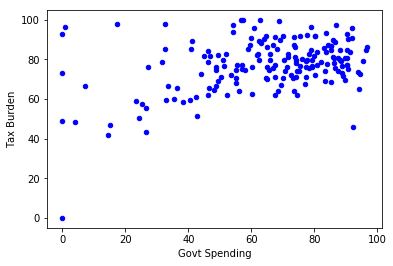

In [43]:
# And Higher Govt Spending obviously yields higher tax burden scores
data.plot.scatter(x="Govt Spending", y="Tax Burden", c="blue")


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


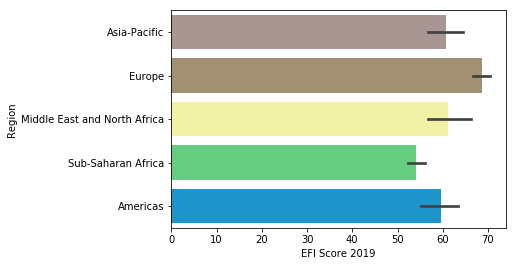

In [44]:
# Here, we can see that Europe has higher scores on average than any other region
sns.barplot(y='Region', x='EFI Score 2019', palette='terrain_r', data=data)

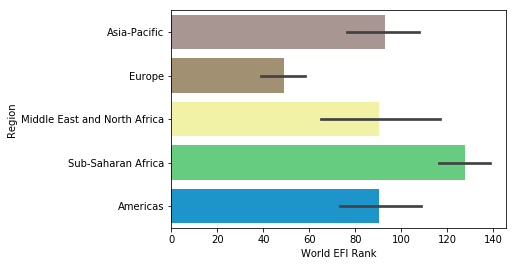

In [45]:
# Higher Rank means lower EFI Score 
# We can see that Europe is doing the best and Africa not so much
sns.barplot(y='Region', x='World EFI Rank', palette='terrain_r', data=data)

### More cleaning with the same techniques on the 2018 dataset

In [46]:
df_2018 = pd.read_excel('index2018_data.xls', encoding = 'latin-1')
df_2018.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,...,Afghanistan,33.400,64.081,1.5,4.3882,1918.6,8.54,4.384,99.569,8.271
1,2,Albania,Albania,Europe,65.0,32.0,64.5,54.1,25.4,39.9,...,Albania,2.885,34.155,2.6,2.0478,11840.2,16.333,1.275,1124.35,71.536
2,3,Algeria,Algeria,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,...,Algeria,40.762,612.513,3.7,3.5802,15026.5,11.222,6.398,1546,20.356
3,4,Angola,Angola,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,...,Angola,27.360,187.261,3,3.9560,6844.43,6.579,32.378,14363.6,71.883
4,5,Argentina,Argentina,Americas,144.0,26.0,52.3,40.8,44.5,32.6,...,Argentina,43.600,874.072,1.2,-0.1570,20047.5,6.557,58.400,5745.18,51.269


In [47]:
# WEBNAME is the same as Country Name with slight differences; so is Country
# CountryID is basically like index
df_2018 = df_2018.drop(["WEBNAME", "CountryID", "Country Name"], axis = 1)


In [48]:
df_2018.rename(columns={ 
    "2019 Score": "EFI Score 2019",
    "World Rank": "World EFI Rank",
    "Region Rank": "Regional EFI Rank",
    "Gov\'t Spending": "Govt Spending",
    "Gov't Expenditure % of GDP ": "Govt Expenditure % of GDP",
    "Investment Freedom ": "Investment Freedom"
}, inplace=True)

In [49]:
df_2018.replace({ 
    '$15.1 (2015 nominal)': 15.1,
    '$6.1 (2014 nominal)': 6.1,
    '$21.0 (nominal)': 21.0,
    '$5.9 (2015 nominal)': 5.9,
    '$9,600 (estimated)': 9600,
    '249.0 (2014 net)': 249.0,
    '1.0 (2014)': 1.0,
    '1.2 (2014)': 1.2,
    '2.4 (2015)': 2.4
    }, inplace=True
)

In [50]:
df_2018['GDP (Billions, PPP)'] = df_2018['GDP (Billions, PPP)'].fillna(0).astype(float)
df_2018['GDP per Capita (PPP)'] = df_2018['GDP per Capita (PPP)'].fillna(0).astype(float)
df_2018['FDI Inflow (Millions)'] = df_2018['FDI Inflow (Millions)'].fillna(0).astype(float)
df_2018['Property Rights'] = df_2018['Property Rights'].fillna(0).astype(float)
df_2018['Judical Effectiveness'] = df_2018['Judical Effectiveness'].fillna(0).astype(float)
df_2018['Government Integrity'] = df_2018['Government Integrity'].fillna(0).astype(float)
df_2018['Tax Burden'] = df_2018['Tax Burden'].fillna(0).astype(float)
df_2018['Govt Spending'] = df_2018['Govt Spending'].fillna(0).astype(float)
df_2018['Fiscal Health'] = df_2018['Fiscal Health'].fillna(0).astype(float)
df_2018['Business Freedom'] = df_2018['Business Freedom'].fillna(0).astype(float)
df_2018['Labor Freedom'] = df_2018['Labor Freedom'].fillna(0).astype(float)
df_2018['Monetary Freedom'] = df_2018['Monetary Freedom'].fillna(0).astype(float)
df_2018['Trade Freedom'] = df_2018['Trade Freedom'].fillna(0).astype(float)
df_2018['Investment Freedom'] = df_2018['Investment Freedom'].fillna(0).astype(float)
df_2018['Financial Freedom'] = df_2018['Financial Freedom'].fillna(0).astype(float)
df_2018['Tariff Rate (%)'] = df_2018['Tariff Rate (%)'].fillna(0).astype(float)
df_2018['Income Tax Rate (%)'] = df_2018['Income Tax Rate (%)'].fillna(0).astype(float)
df_2018['Corporate Tax Rate (%)'] = df_2018['Corporate Tax Rate (%)'].fillna(0).astype(float)
df_2018['Tax Burden % of GDP'] = df_2018['Tax Burden % of GDP'].fillna(0).astype(float)
df_2018['Govt Expenditure % of GDP'] = df_2018['Govt Expenditure % of GDP'].fillna(0).astype(float)
df_2018['Population (Millions)'] = df_2018['Population (Millions)'].fillna(0).astype(float)
df_2018['GDP Growth Rate (%)'] = df_2018['GDP Growth Rate (%)'].fillna(0).astype(float)
df_2018['5 Year GDP Growth Rate (%)'] = df_2018['5 Year GDP Growth Rate (%)'].fillna(0).astype(float)
df_2018['Unemployment (%)'] = df_2018['Unemployment (%)'].fillna(0).astype(float)
df_2018['Inflation (%)'] = df_2018['Inflation (%)'].fillna(0).astype(float)
df_2018['Public Debt (% of GDP)'] = df_2018['Public Debt (% of GDP)'].fillna(0).astype(float)
# df_2018['Unemployment (%)'].unique()

In [51]:
df_2018.head()

,Region,World EFI Rank,Regional EFI Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,...,Afghanistan,33.400,64.081,1.5,4.3882,1918.599,8.540,4.384,99.568966,8.271
1,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,...,Albania,2.885,34.155,2.6,2.0478,11840.228,16.333,1.275,1124.348062,71.536
2,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,...,Algeria,40.762,612.513,3.7,3.5802,15026.461,11.222,6.398,1546.000000,20.356
3,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,...,Angola,27.360,187.261,3.0,3.9560,6844.433,6.579,32.378,14363.558989,71.883
4,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,...,Argentina,43.600,874.072,1.2,-0.1570,20047.489,6.557,58.400,5745.183000,51.269


# Analysis Findings and Action Items: 

There are a lot of questions I can try and answer with this data. 

*Question 1 - What can the data tell me about how to group/categorize it?*


**1) Data originally came without labels:**
    - Plan: do clustering on 2018 and 2019 data to see what possible groups there may be [WIP]
    
    
*Question 2 - Given the labels for the 2018 data, can I train an accurate model
to predict 2018 labels and can I use the trained 2018 model to predict unknown 
2019 labels?*

*Question 3 - If I then introduce the 2019 labels afterwards can I see how if that
2018 model predicted accurately?*


**2) There are applications for classification in this data:**
    - Plan: Classify 2018 data using built in labels [DONE]
    - Plan: Classify 2019 data using 2018 data labels [DONE]
    - Plan: Apply labels to 2019 data and run predictions with that [DONE] 
    
    
*Question 4 - Given the 2018 and 2019 EFI Scores can I predict new EFI scores for 
each respective dataset?* 


**3) Applications for regression on this dataset:**
    - Plan: Use regression to predict 2018 EFI Score on 2018 dataset
    - Plan: Use regression to predict 2019 EFI Score on 2019 dataset

# Adding labels

These labels came from the Heritage Foundation (they issue this dataset) and they are the official way to interpret the EFI scores. 

In [52]:
conditions = [
    (df_2018["2018 Score"] >= 80.0),
    (df_2018["2018 Score"] < 80.0) & (df_2018["2018 Score"] >= 70.0),
    (df_2018["2018 Score"] < 70.0) & (df_2018["2018 Score"] >= 60.0),
    (df_2018["2018 Score"] < 60.0) & (df_2018["2018 Score"] >= 50.0),
    (df_2018["2018 Score"] < 49.9)
]

choices = ["Free", "Mostly Free", "Moderately Free", "Mostly Unfree", "Repressed"]
df_2018["Freedom Level"] = np.select(conditions, choices, default="None")
df_2018.head()

,Region,World EFI Rank,Regional EFI Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Freedom Level
0,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,...,33.400,64.081,1.5,4.3882,1918.599,8.540,4.384,99.568966,8.271,Mostly Unfree
1,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,...,2.885,34.155,2.6,2.0478,11840.228,16.333,1.275,1124.348062,71.536,Moderately Free
2,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,...,40.762,612.513,3.7,3.5802,15026.461,11.222,6.398,1546.000000,20.356,Repressed
3,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,...,27.360,187.261,3.0,3.9560,6844.433,6.579,32.378,14363.558989,71.883,Repressed
4,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,...,43.600,874.072,1.2,-0.1570,20047.489,6.557,58.400,5745.183000,51.269,Mostly Unfree


# Adding more broad categories

The official labels were good, but I was unfamiliar with how to perform classification using that many labels. I simplified the scores above into two categories here so that I could use logistic regression to train my data. 

In [53]:
conditions = [
    (df_2018["2018 Score"] >= 50.0),
    (df_2018["2018 Score"] < 50.0)
]

# Some freedom vs Repressed
choices = ["1", "0"]
df_2018["Binary Freedom"] = np.select(conditions, choices, default="None")
df_2018

,Region,World EFI Rank,Regional EFI Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Freedom Level,Binary Freedom
0,Asia-Pacific,154.0,38.0,51.3,17.900000,28.200000,26.2,91.8,79.300000,98.300000,...,64.081,1.5,4.3882,1918.599,8.540,4.384,99.568966,8.271,Mostly Unfree,1
1,Europe,65.0,32.0,64.5,54.100000,25.400000,39.9,85.1,72.700000,67.500000,...,34.155,2.6,2.0478,11840.228,16.333,1.275,1124.348062,71.536,Moderately Free,1
2,Middle East / North Africa,172.0,14.0,44.7,27.800000,35.200000,29.0,74.0,45.900000,19.200000,...,612.513,3.7,3.5802,15026.461,11.222,6.398,1546.000000,20.356,Repressed,0
3,Sub-Saharan Africa,164.0,40.0,48.6,36.000000,25.400000,18.9,82.4,69.100000,54.800000,...,187.261,3.0,3.9560,6844.433,6.579,32.378,14363.558989,71.883,Repressed,0
4,Americas,144.0,26.0,52.3,40.800000,44.500000,32.6,65.7,55.600000,52.600000,...,874.072,1.2,-0.1570,20047.489,6.557,58.400,5745.183000,51.269,Mostly Unfree,1
5,Europe,44.0,20.0,68.7,55.300000,47.400000,40.5,84.7,80.000000,67.200000,...,25.783,3.0,3.4528,8620.975,16.759,-1.406,338.033697,51.813,Moderately Free,1
6,Asia-Pacific,5.0,4.0,80.9,78.700000,93.400000,77.4,63.0,61.200000,84.300000,...,1187.321,2.5,2.6792,48899.123,5.738,1.301,48190.245389,41.091,Free,1
7,Europe,32.0,17.0,71.8,83.500000,80.900000,73.5,49.9,19.400000,81.100000,...,417.226,0.9,0.7920,48004.660,6.109,0.973,-6088.525334,83.871,Mostly Free,1
8,Asia-Pacific,67.0,14.0,64.3,53.600000,36.800000,39.9,87.5,59.400000,95.500000,...,165.533,1.1,1.6188,17438.590,5.073,12.400,4500.000000,37.673,Moderately Free,1
9,Americas,74.0,15.0,63.3,46.500000,53.500000,50.9,96.5,82.900000,59.000000,...,9.043,0.5,0.1832,24555.152,15.313,0.402,521.854452,66.917,Moderately Free,1


In [54]:
df_2018 = df_2018.dropna(subset=['2018 Score'])

# Goals 🔥 for logistic regression: 

## 1) Predict 2018 classifiers using classifed 2018 data
## 2) Predict 2019 classifiers using classified 2018 data 
## 3) Evaluate model performance using confusion matrix, accuracy, precision, recall and f1 score


In [55]:
df_2018.columns.unique()

Index(['Region', 'World EFI Rank', 'Regional EFI Rank', '2018 Score',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Govt Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Govt Expenditure % of GDP', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Freedom Level', 'Binary Freedom'],
      dtype='object')

In [56]:
feature_cols = ['World EFI Rank', 'Regional EFI Rank',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Govt Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Govt Expenditure % of GDP', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)',]

In [57]:
X = df_2018[feature_cols]
y = df_2018['Binary Freedom']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_test.value_counts()



1    38
0     7
Name: Binary Freedom, dtype: int64

In [58]:

# Validating that this is one fourth of total data
y_test.count() / df_2018['2018 Score'].count()


0.25

In [59]:
lr = LogisticRegression()

In [60]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(y_pred)


['1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1'
 '0' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1']


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
print(y_test.values.T)

['1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1']


# Logistic Regression Model Evaluation

In [66]:
print("Accuracy of 2018 label predictions: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))
print("Precision for 2018 label predictions: {:.2f}%".format(metrics.precision_score(y_test, y_pred, pos_label='1')*100))
print("Recall for 2018 label predictions: {:.2f}%".format(metrics.recall_score(y_test, y_pred, pos_label='1')*100))
print("f1 Score for 2018 label predictions: {:.2f}%".format(metrics.f1_score(y_test, y_pred, pos_label='1')*100))
      
      

Accuracy of 2018 label predictions: 97.78%
Precision for 2018 label predictions: 100.00%
Recall for 2018 label predictions: 97.37%
f1 Score for 2018 label predictions: 98.67%


In [67]:
matrix = metrics.confusion_matrix(y_test, y_pred)

In [68]:
def cmat_(cm, labels=None):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="g", ax=ax)
    
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    
    if labels:
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)
    plt.show()

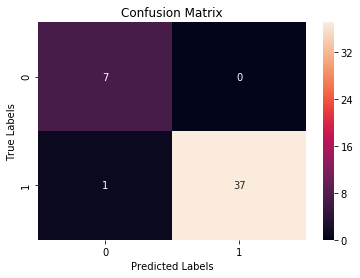

In [69]:
cmat_(matrix)

### What we have:
    - `data` --> 2019 Dataset (no labels)
    - `df_2018` --> 2018 Dataset (labels included)

### What we want:
- X_train, X_test, y_train, y_test
    - X_train: 2018 data with labels removed
    - X_test: 2019 data
    - y_train: 2018 labels
    - y_test: DOESN'T EXIST
    
### How to get from have to want:
- Train on **all** of `df_2018` data now that you know that you can get *very accurate* prediction accuracies.
- Test on either **all** or **some** of `data` for 2019 since it doesn't have labels.

# Now we'll try something a little Risky...

We will try to predict the 2019 classifications using our model trained on 
2018 data. 


I frame it this way, because at first I couldn't find labels for 2019 data, but still wanted to predict on it. 


Don't worry, I eventually found the labels. We will come back and verify this later on. 

# 🌟 Prediction Process!

In [70]:
X_train_comb = df_2018[feature_cols] # X_train gets all features from 2018
X_test_comb = data[feature_cols] # X_test gets all features from 2019

y_train_comb = df_2018['Binary Freedom'] # y_train gets labels from 2018
# y_test does not exist in this scenario 😱

X_train 

,World EFI Rank,Regional EFI Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,Business Freedom,Labor Freedom,...,Govt Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
81,30.0,8.0,86.0,73.2,79.2,67.4,54.1,49.3,81.7,79.2,...,39.127169,126.901,5237.790,0.5,1.2068,41274.605,3.136,-0.113,11388.407710,239.184
19,91.0,38.0,39.5,43.7,28.4,83.5,41.5,94.4,49.3,59.6,...,44.146667,3.854,42.234,2.8,1.5972,10957.542,25.761,-1.100,285.243452,44.368
140,137.0,26.0,38.0,28.2,39.4,82.0,69.5,45.8,65.9,42.7,...,31.873333,0.208,0.638,4.0,4.1768,3071.841,13.598,5.433,22.150000,92.775
107,134.0,24.0,23.9,17.6,28.9,75.9,72.8,71.8,64.2,59.2,...,30.104333,3.794,16.418,1.9,3.9812,4327.955,11.657,1.472,271.645740,99.607
149,114.0,26.0,49.4,57.3,36.8,65.5,35.6,99.8,68.9,72.4,...,46.347667,0.601,1.185,3.3,2.9408,1972.582,31.426,0.437,24.529872,9.043
16,120.0,17.0,35.5,31.3,30.2,67.4,85.6,49.7,60.7,49.9,...,21.873667,11.128,23.585,5.2,4.8972,2119.434,1.005,-0.809,160.585150,50.300
51,175.0,45.0,29.8,17.6,26.2,69.6,61.0,19.1,45.6,29.8,...,36.058667,0.821,31.720,-12.2,-2.7532,38639.066,7.334,1.400,53.962173,21.655
174,18.0,2.0,79.3,76.9,71.9,65.1,56.5,54.8,82.7,91.4,...,38.058865,323.298,18569.100,2.4,2.0966,57436.409,4.906,1.275,391104.000000,107.351
124,93.0,8.0,59.5,57.4,51.5,98.5,25.0,17.7,76.3,55.2,...,49.998667,3.957,184.788,4.1,4.6962,46697.960,17.522,1.100,142.000000,34.274
40,92.0,39.0,65.9,56.5,40.5,66.0,32.5,67.2,58.9,43.0,...,47.417667,4.170,95.063,1.6,0.1654,22795.312,13.476,-1.125,1744.658846,84.379


In [125]:
pred_2019 = lr.predict(X_test_comb)
pred_2019

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0'],
 

## MAIN GOAL: 
- Import labels.
- Get y-test and compare to y_pred above using confusion matrix.

- Do some clustering to potentially match results of logistic results. 

## STRETCH GOAL:
- Import labels.
- Aggregate 2018 and 2019 data with new labels.
- Go back to 🌟 **Prediction Process!** and retrain/retest now using 2019 data. (If data is aggregated, use `train_test_split()`. 
- Compare accuracy using confusion matrix and other relevant tactics. 

### Now that we've played around with that, let's get the 2019 labels so that we can evaluate our model. 




# Import 2019 Labels to get y_test

In [79]:
conditions = [
    (data["EFI Score 2019"] >= 50.0),
    (data["EFI Score 2019"] < 50.0)
]

# Some freedom vs Repressed
choices = ["1", "0"]
data["Binary Freedom"] = np.select(conditions, choices, default="None")
data

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Region,World EFI Rank,Regional EFI Rank,EFI Score 2019,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Binary Freedom
0,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,35.5,696.0,2.5,2.9,1958.0,8.8,5.0,539.0,7.3,1
1,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,2.9,360.0,3.9,2.5,12507.0,13.9,2.0,11191.0,71.2,1
2,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,41.5,6329.0,2.0,3.1,15237.0,10.0,5.6,12030.0,25.8,0
3,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,28.2,1903.0,0.7,2.9,6753.0,8.2,31.7,22545.0,65.3,1
4,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,44.1,9202.0,2.9,0.7,20876.0,8.7,25.7,118570.0,52.6,1
5,Europe,47.0,24.0,67.7,57.2,46.3,38.6,84.7,79.0,53.0,...,3.0,283.0,7.5,3.6,9456.0,18.2,0.9,2457.0,53.5,1
6,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,...,24.8,12465.0,2.3,2.4,50334.0,5.6,2.0,463680.0,41.6,1
7,Europe,31.0,16.0,72.0,84.2,71.3,77.4,50.5,24.5,85.5,...,8.8,4396.0,2.9,1.3,49869.0,5.5,2.2,96296.0,78.8,1
8,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,89.4,...,9.8,1718.0,0.1,1.2,17492.0,5.0,13.0,28670.0,54.7,1
9,Americas,76.0,15.0,62.9,42.2,46.9,43.7,97.3,86.8,65.7,...,0.4,116.0,1.3,-0.7,31139.0,12.6,1.4,9277.0,57.2,1


In [80]:
y_test_comb = data['Binary Freedom']


# Just a side by side of the predicted and actual values

In [81]:
print("Prediction values:\n", pred_2019)
# unique, counts = np.unique(pred_2019, return_counts=True)
# print(np.asarray((unique, counts)).T)

Prediction values:
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '0'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '0']


In [82]:
print("Test values:\n", y_test_comb.values.T)

Test values:
 ['1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '0' '1' '1' '0' '0'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1' '0'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '0']


In [83]:
# Pretty good!
print("Accuracy of 2019 label predictions: {:.2f}%".format(metrics.accuracy_score(y_test_comb, pred_2019)*100))
print("Precision of 2019 label predictions: {:.2f}%".format(metrics.precision_score(y_test_comb, pred_2019, pos_label='1')*100))
print("Recall of 2019 label predictions: {:.2f}%".format(metrics.recall_score(y_test_comb, pred_2019, pos_label='1')*100))
print("f1 Score of 2019 label predictions: {:.2f}%".format(metrics.f1_score(y_test_comb, pred_2019, pos_label='1')*100))
 
 
      

Accuracy of 2019 label predictions: 95.56%
Precision of 2019 label predictions: 96.88%
Recall of 2019 label predictions: 98.10%
f1 Score of 2019 label predictions: 97.48%


In [84]:
new_matrix = metrics.confusion_matrix(y_test_comb, pred_2019)

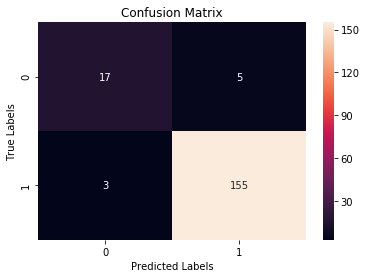

In [85]:
cmat_(new_matrix)

# Goals 🔥 for clustering: 

## 1) Get predictions using K-Means clustering for unscaled data
## 2) Get predictions using K-Means clustering for scaled/PCA data  
## 3) Hope it works 🤷🏾‍♀️


In [90]:
data.iloc[0]

Region                        Asia-Pacific
World EFI Rank                         152
Regional EFI Rank                       39
EFI Score 2019                        51.5
Property Rights                       19.6
Judical Effectiveness                 29.6
Government Integrity                  25.2
Tax Burden                            91.7
Govt Spending                         80.3
Fiscal Health                         99.3
Business Freedom                      49.2
Labor Freedom                         60.4
Monetary Freedom                      76.7
Trade Freedom                           66
Investment Freedom                      10
Financial Freedom                       10
Tariff Rate (%)                          7
Income Tax Rate (%)                     20
Corporate Tax Rate (%)                  20
Tax Burden % of GDP                      5
Govt Expenditure % of GDP             25.6
Country                        Afghanistan
Population (Millions)                 35.5
GDP (Billio

In [91]:
[150, 40, 49.7, 19.6, 30.1, 0, 92, 80.1, 98.7, 48.5, 60.1, 77.7, 64, 9, 11, 6, 19, 21, 4, 26.1, 35.9, 701, 2.2, 3.0, 1963, 9.1, 6, 541, 7.6]

kdata2019 = data.drop(["Region", "Country"], axis = 1)


In [145]:
kdata2018 = df_2018.drop(["Region", "Country", "Freedom Level"], axis = 1)

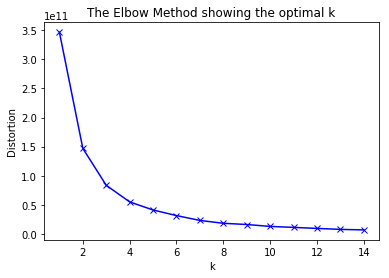

In [148]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(kdata2018) # 2018 data
    sum_of_squared_distances.append(km.inertia_)
    

# Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Seems like we've got two clusters here

In [151]:
# STEP 1: Instantiate our model with best guess as to n_clusters.
kmeans_model = KMeans(n_clusters=5) # Didnt work with 2, trying with 5

# STEP 2: Fit our data to our model.
kmeans_model.fit(kdata2019) # unscaled data

# STEP 3: Check our model label types.
targets_pred = kmeans_model.labels_

# STEP 4: Run some predictions!
kmeans_model.predict([[150, 40, 49.7, 19.6, 30.1, 25.7, 92, 80.1, 98.7, 48.5, 60.1, 77.7, 64, 9, 11, 6, 19, 21, 4, 26.1, 35.9, 701, 2.2, 3.0, 1963, 9.1, 6, 541, 7.6, 1]]) 
# test point w/ true label 1

# STEP 5 (optional): Check the Cluster Centers.
# kmeans_model.cluster_centers_

array([0], dtype=int32)

# Figured out multiclassing with Logistic Regression to use with KMeans 😅

In [221]:
multi_lr = LogisticRegression(solver='saga', multi_class='multinomial')

# Needed new integer classifiers to feed my LR model

In [222]:
conditions = [
    (df_2018["2018 Score"] >= 80.0),
    (df_2018["2018 Score"] < 80.0) & (df_2018["2018 Score"] >= 70.0),
    (df_2018["2018 Score"] < 70.0) & (df_2018["2018 Score"] >= 60.0),
    (df_2018["2018 Score"] < 60.0) & (df_2018["2018 Score"] >= 50.0),
    (df_2018["2018 Score"] < 49.9)
]

choices = [1, 2, 3, 4, 5]
df_2018["Freedom Level Int"] = np.select(conditions, choices, default="None")
df_2018.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Region,World EFI Rank,Regional EFI Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Freedom Level,Binary Freedom,Freedom Level Int
0,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,...,1.5,4.3882,1918.599,8.540,4.384,99.568966,8.271,Mostly Unfree,1,4
1,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,...,2.6,2.0478,11840.228,16.333,1.275,1124.348062,71.536,Moderately Free,1,3
2,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,...,3.7,3.5802,15026.461,11.222,6.398,1546.000000,20.356,Repressed,0,5
3,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,...,3.0,3.9560,6844.433,6.579,32.378,14363.558989,71.883,Repressed,0,5
4,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,...,1.2,-0.1570,20047.489,6.557,58.400,5745.183000,51.269,Mostly Unfree,1,4


In [223]:
y_multi = df_2018['Freedom Level Int']

In [224]:
y_train_multi, y_test_multi = train_test_split(y_multi, test_size=0.25, random_state=42)
# y_train_multi

In [225]:
multi_lr.fit(X_train, y_train_multi)

multi_pred = multi_lr.predict(X_test_comb)
multi_pred

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array(['3', '3', '3', '4', '5', '3', '5', '4', '4', '3', '3', '5', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '5', '3', '3', '4', '5',
       '3', '5', '4', '5', '3', '3', '4', '4', '5', '5', '3', '5', '4',
       '4', '4', '3', '3', '4', '4', '3', '3', '3', '4', '3', '5', '3',
       '3', '3', '3', '3', '5', '3', '3', '5', '3', '3', '4', '5', '5',
       '4', '4', '4', '3', '3', '4', '4', '5', '3', '3', '5', '5', '4',
       '4', '5', '4', '3', '4', '4', '4', '4', '3', '5', '4', '3', '3',
       '3', '4', '3', '4', '3', '4', '3', '3', '3', '3', '4', '4', '4',
       '3', '4', '3', '3', '3', '5', '3', '3', '4', '3', '4', '5', '3',
       '3', '5', '3', '4', '4', '5', '4', '3', '5', '4', '3', '3', '5',
       '5', '4', '4', '3', '4', '5', '4', '3', '3', '3', '3', '3', '4',
       '4', '3', '4', '5', '3', '3', '3', '3', '5', '4', '4', '3', '4',
       '5', '3', '3', '4', '4', '3', '3', '3', '3', '3', '4', '4', '4',
       '4', '4', '4', '5', '3', '3', '3', '3', '5', '4', '4'],
 

In [242]:
targets_true = np.array([int(item) for item in multi_pred]) # map to be same values as results
targets_true

array([3, 3, 3, 4, 5, 3, 5, 4, 4, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5,
       3, 3, 4, 5, 3, 5, 4, 5, 3, 3, 4, 4, 5, 5, 3, 5, 4, 4, 4, 3, 3, 4,
       4, 3, 3, 3, 4, 3, 5, 3, 3, 3, 3, 3, 5, 3, 3, 5, 3, 3, 4, 5, 5, 4,
       4, 4, 3, 3, 4, 4, 5, 3, 3, 5, 5, 4, 4, 5, 4, 3, 4, 4, 4, 4, 3, 5,
       4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 5,
       3, 3, 4, 3, 4, 5, 3, 3, 5, 3, 4, 4, 5, 4, 3, 5, 4, 3, 3, 5, 5, 4,
       4, 3, 4, 5, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 5, 3, 3, 3, 3, 5, 4, 4,
       3, 4, 5, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 3, 3, 3,
       3, 5, 4, 4])

In [241]:
# we can see here that the labels have been switched
# unsure what is the best way to assign correct labels to various clusters
# without messing with model accuracy
targets_pred

array([0, 0, 0, 0, 4, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 4, 0, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0,
       0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 1, 0, 0, 0,
       0, 4, 0, 0], dtype=int32)

In [291]:
start_labels = [1, 2, 3, 4, 5]
perms = list(permutations(start_labels))

def make_clusters_better(targets_pred, labels):
    clusters = []
    errors = {}
    for i, item in enumerate(targets_pred):
        if item == 0:
            clusters.append(labels[0])
        elif item == 1:
            clusters.append(labels[1])
        elif item == 2:
            clusters.append(labels[2])
        elif item == 3:
            clusters.append(labels[3])
        elif item == 4:
            clusters.append(labels[4])
    return clusters

def count_error(clusters):
    error_counter = 0
    for index, item in enumerate(clusters):
        if int(item) != targets_true[index]:
            error_counter += 1

    total_error = 100 * error_counter / len(clusters)

    return 100 - total_error

def check_perms(permutations):
    for index, perm in enumerate(permutations): 
        clusters = make_clusters_better(targets_pred, perm)
#         print(index, count_error(clusters))
check_perms(perms)

In [292]:
clusters = np.array(make_clusters_better(targets_pred, perms[58]))
print(f"Relabeled clusters:\n{clusters}")
print(f"True values:\n{targets_true}")
print("\nTOTAL ERROR IN UNSCALED DATA CLUSTERING PREDICTION IS: {:.2f}%".format(count_error(clusters)))

Relabeled clusters:
[3 3 3 3 4 3 5 4 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 4 3 3 3 3 1 4 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 5 3 3 3 3 3 3 3 3 1 3
 3 5 4 3 4 4 4 3 4 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 4 3
 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 5 3
 3 3 3 4 3 3 3 4 5 3 3 3 3 3 3 3 3 3 4 3 3 3 4 4 2 3 3 3 3 4 3 3]
True values:
[3 3 3 4 5 3 5 4 4 3 3 5 3 3 3 3 3 3 3 3 3 5 3 3 4 5 3 5 4 5 3 3 4 4 5 5 3
 5 4 4 4 3 3 4 4 3 3 3 4 3 5 3 3 3 3 3 5 3 3 5 3 3 4 5 5 4 4 4 3 3 4 4 5 3
 3 5 5 4 4 5 4 3 4 4 4 4 3 5 4 3 3 3 4 3 4 3 4 3 3 3 3 4 4 4 3 4 3 3 3 5 3
 3 4 3 4 5 3 3 5 3 4 4 5 4 3 5 4 3 3 5 5 4 4 3 4 5 4 3 3 3 3 3 4 4 3 4 5 3
 3 3 3 5 4 4 3 4 5 3 3 4 4 3 3 3 3 3 4 4 4 4 4 4 5 3 3 3 3 5 4 4]

TOTAL ERROR IN UNSCALED DATA CLUSTERING PREDICTION IS: 58.33%


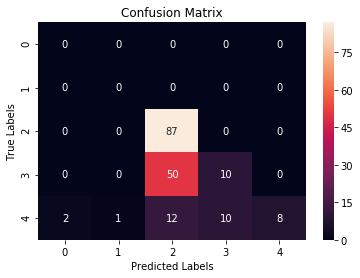

In [293]:
cmat_obj = metrics.confusion_matrix(targets_true, clusters)
cmat_(cmat_obj)

# Let's Scale the Data and See if Results are Better


In [100]:
scaler = StandardScaler().fit(kdata2019)
X_scaled = scaler.transform(kdata2019)
X_scaled

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  


array([[ 1.18358632,  1.45326723, -0.82572973, ..., -0.31206022,
        -1.44354089,  0.37314944],
       [-0.74094428,  0.50862166,  0.51064279, ..., -0.2709605 ,
         0.45191298,  0.37314944],
       [ 1.54924713, -0.51474437, -1.29791468, ..., -0.2677233 ,
        -0.89477881, -2.67989145],
       ...,
       [ 0.72169897,  0.74478306, -0.48718202, ...,  0.22989507,
         0.06629639,  0.37314944],
       [ 0.91415203,  0.50862166, -0.63863758, ..., -0.27203699,
         0.18494765,  0.37314944],
       [ 1.62622835,  1.92559002, -1.81464539, ..., -0.30297367,
         0.66548525, -2.67989145]])

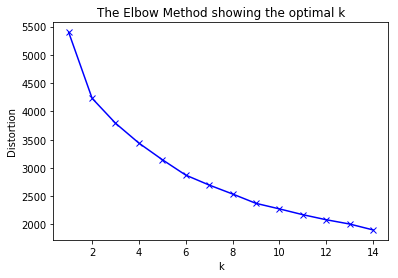

In [101]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Hmm...still looks a little weird. But still shows 2 clusters as optimal

😬 Uhhhh....wtf.
First indication that something is waaaay off.


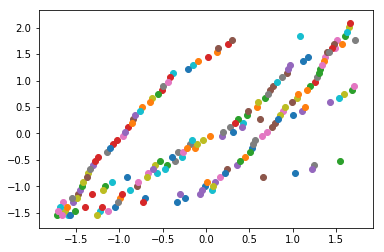

It looks like its just showing the ranked regions


In [105]:
print("😬 Uhhhh....wtf.")
print("First indication that something is waaaay off.")
for k, (i,j) in enumerate(zip(X_scaled[:, 0], X_scaled[:, 1])):
    plt.scatter(i, j)
    
plt.show()

print("It looks like its just showing the ranked regions")

Kind of like this plot from before.


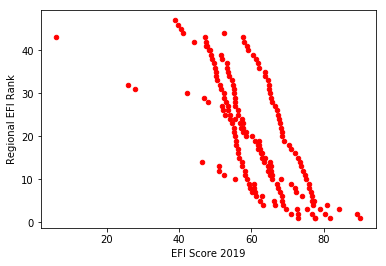

In [106]:
print("Kind of like this plot from before.")
data.plot.scatter(x="EFI Score 2019", y="Regional EFI Rank", c="red")


In [107]:
# STEP 1: Instantiate our model with best guess as to n_clusters.
kmeans_model = KMeans(n_clusters=2)

# STEP 2: Fit our data to our model.
kmeans_model.fit(X_scaled) # scaled data

# STEP 3: Check our model label types.
scaled_targets_pred = kmeans_model.labels_

# STEP 4: Run some predictions!
# kmeans_model.predict([[13260, 1195, 4220, 6400, 500, 1790]]) # test point w/ true label 0

# STEP 5 (optional): Check the Cluster Centers.
kmeans_model.cluster_centers_

array([[ 0.79077949,  0.50862166, -0.70203321, -0.71745187, -0.62850692,
        -0.6371329 ,  0.07359239,  0.2494339 , -0.34585009, -0.61769861,
        -0.349952  , -0.40563905, -0.60628689, -0.63253606, -0.65194634,
         0.46886691, -0.02340866,  0.28303243, -0.41733789, -0.18766244,
         0.10064618, -0.05380074,  0.07338535,  0.1576949 , -0.58630506,
        -0.11204373,  0.09037779, -0.15885079, -0.0949132 , -0.33387055],
       [-0.88381237, -0.56845951,  0.78462536,  0.80185797,  0.70244891,
         0.71208971, -0.08225031, -0.27877906,  0.38653834,  0.69036903,
         0.39112282,  0.4533613 ,  0.67761476,  0.70695206,  0.7286459 ,
        -0.52402772,  0.02616262, -0.31633036,  0.46643647,  0.20974037,
        -0.11248691,  0.06013023, -0.08201893, -0.17624725,  0.65528212,
         0.12522534, -0.10101047,  0.17753912,  0.10607946,  0.37314944]])

In [108]:
print("TRUE TARGETS:\n",targets_true)
print("SCALED PREDICTED TARGETS:\n",scaled_targets_pred)

TRUE TARGETS:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0]
SCALED PREDICTED TARGETS:
 [0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0]


In [109]:
error_counter = 0
for index, item in enumerate(scaled_targets_pred):
    if item != targets_true[index]:
        error_counter += 1
        
total_error = 100 * error_counter / len(scaled_targets_pred)

print("\nTOTAL ERROR IN SCALED DATA CLUSTERING PREDICTION IS: {:.2f}%".format(total_error))
print("\nACCURACY OF SCALED DATA CLUSTERING MODEL IS: {:.2f}%\n".format(100 - total_error))


TOTAL ERROR IN SCALED DATA CLUSTERING PREDICTION IS: 43.89%

ACCURACY OF SCALED DATA CLUSTERING MODEL IS: 56.11%



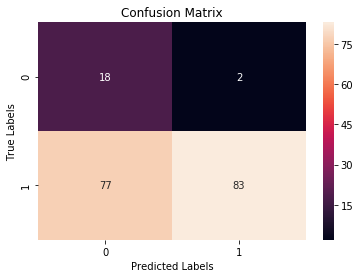

In [110]:
scaled_cmat = metrics.confusion_matrix(targets_true, scaled_targets_pred)
cmat_(scaled_cmat)

## Our first results were 
### 88% inaccurate and 12% accurate. 

## If that were just inverted, then we should have gotten something better with scaled data 
### like 90% or 95% inaccruate or whatever 

## Then we would know that we just needed to switch 1s with 0s and 0s with 1s
### But we got completely different results that are between 40 and 60%

## I believe that this dataset might not contain a good clustering problem. 

# Now Kash told me on multiple occasions that this was not a great PCA problem. 


## But somehow I decided to try PCA on it anyway
## I figure that it might help to reduce dimensionality and maybe aid in visualizing the clustering.

# It is worth a shot!

In [77]:
pca = PCA()
X_r = pca.fit_transform(X_scaled)

In [81]:
print("Possible PCs:", len(pca.explained_variance_))
print("Explained variance:", pca.explained_variance_)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Explained variance ratio with cumulative sum:", 
     pca.explained_variance_ratio_.cumsum())
print("Only retaining 45% of the variance in my dataset. Doesn't seem great.\n I did try versions with higher cumulative EVR and they were not much better for the visualization.")

# loop through PCs:
    # add them to a list until the cumulative sum of explained variance is greater than 75%

Possible PCs: 30
Explained variance: [9.98168930e+00 3.71593417e+00 2.65231519e+00 2.14861909e+00
 1.77173288e+00 1.51668521e+00 1.17738457e+00 9.66814643e-01
 8.49462835e-01 7.94555029e-01 6.44779399e-01 5.79296539e-01
 5.18339935e-01 4.11973466e-01 3.55480965e-01 3.37742328e-01
 2.78431645e-01 2.70850737e-01 2.26010815e-01 2.05128619e-01
 1.75625400e-01 1.48326049e-01 1.37504288e-01 8.61016749e-02
 8.31250450e-02 5.39868851e-02 4.06679189e-02 2.16830039e-02
 1.73455329e-02 4.58639166e-06]
Explained variance ratio: [3.30874516e-01 1.23176337e-01 8.79193369e-02 7.12227440e-02
 5.87296640e-02 5.02753060e-02 3.90281183e-02 3.20481150e-02
 2.81581199e-02 2.63380278e-02 2.13732431e-02 1.92026075e-02
 1.71820090e-02 1.36561575e-02 1.17835357e-02 1.11955327e-02
 9.22949341e-03 8.97820035e-03 7.49183999e-03 6.79963386e-03
 5.82165678e-03 4.91673385e-03 4.55801252e-03 2.85411107e-03
 2.75544131e-03 1.78956526e-03 1.34806620e-03 7.18751425e-04
 5.74972295e-04 1.52030390e-07]
Explained variance 

In [92]:
THRESHOLD = 0.85
important_PCs = list()

for index, cum_exp_var in enumerate(pca.explained_variance_ratio_.cumsum()):
    if cum_exp_var >= THRESHOLD:
        print("We want the top {} Principal Components! Explained Variance: {:.3f}%".format(index + 1, 100 * cum_exp_var))
        break
        
pca.components_[:index]

We want the top 11 Principal Components! Explained Variance: 86.914%


array([[ 2.97595391e-01,  2.19340018e-01, -3.05326632e-01,
        -2.85879243e-01, -2.69489932e-01, -2.66601014e-01,
        -5.59027041e-04,  5.39864965e-02, -1.42944794e-01,
        -2.67012569e-01, -1.72053599e-01, -2.00492763e-01,
        -2.53409518e-01, -2.46453223e-01, -2.61044463e-01,
         2.12473636e-01, -3.78424586e-02,  8.58577651e-02,
        -1.52120816e-01, -2.16969365e-02,  6.53072924e-04,
        -5.91367893e-02, -3.92946484e-02, -6.85671612e-03,
        -2.22492996e-01,  4.73449582e-03,  8.05944732e-02,
        -1.09474266e-01, -2.54790931e-02, -1.89282132e-01],
       [ 3.42983233e-02,  1.33160366e-01, -1.03764936e-01,
         8.76940286e-02,  5.20807933e-02,  1.28582456e-01,
        -3.63909370e-01, -4.07047834e-01, -1.15442167e-01,
         3.86365503e-03, -1.24836276e-01, -7.86078483e-02,
        -3.98454619e-02,  4.40458028e-02,  3.32629378e-02,
         6.50378586e-02,  2.11403833e-01,  4.18589949e-02,
         3.16859445e-01,  3.91088697e-01, -5.17479744e-

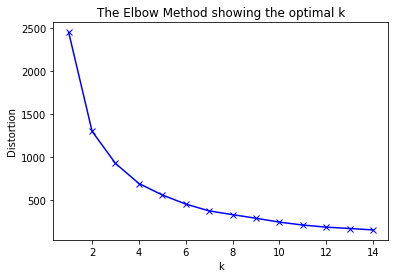

In [67]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_r)
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

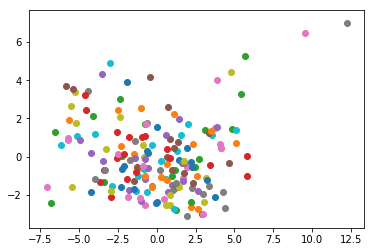

In [68]:
for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(i, j)
    
plt.show()

# Doesn't really seem to provide any better information about the categories in this dataset. 
# Perhaps Kash was right. 

In [69]:
# STEP 1: Instantiate our model with best guess as to n_clusters.
kmeans_model = KMeans(n_clusters=2)

# STEP 2: Fit our data to our model.
kmeans_model.fit(X_r) # PCA fitted data

# STEP 3: Check our model label types.
PCA_targets_pred = kmeans_model.labels_

# STEP 4: Run some predictions!
# kmeans_model.predict([[13260, 1195, 4220, 6400, 500, 1790]]) # test point w/ true label 0

# STEP 5 (optional): Check the Cluster Centers.
kmeans_model.cluster_centers_

array([[ 2.37107336, -0.32518499],
       [-2.65002317,  0.36344205]])

In [70]:
print("TRUE TARGETS:\n", targets_true)
print("SCALED PREDICTED TARGETS:\n", PCA_targets_pred)

TRUE TARGETS:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0]
SCALED PREDICTED TARGETS:
 [0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0]


In [71]:
error_counter = 0
for index, item in enumerate(PCA_targets_pred):
    if item != targets_true[index]:
        error_counter += 1
        
total_error = 100 * error_counter / len(PCA_targets_pred)

print("\nTOTAL ERROR IN SCALED DATA CLUSTERING PREDICTION IS: {:.2f}%".format(total_error))
print("\nACCURACY OF SCALED DATA CLUSTERING MODEL IS: {:.2f}%\n".format(100 - total_error))


TOTAL ERROR IN SCALED DATA CLUSTERING PREDICTION IS: 43.89%

ACCURACY OF SCALED DATA CLUSTERING MODEL IS: 56.11%



# Yeah the PCA isn't adding any value here. Kash was right. 

# Goals 🔥 for Linear Regression: 

## 1) Predict 2018 EFI Score from 2018 data 
## 2) Predict 2019 EFI Score from 2019 data
## 3) Evaluate model performance using r squared score


In [202]:
lr_reg = LinearRegression() # instantiate LinearRegression class

In [303]:
X_reg = kdata2018
y_reg = df_2018["2018 Score"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.50, random_state=0)

In [304]:
lr_reg.fit(X_train_reg, y_train_reg)
print(lr_reg.intercept_)
print(lr_reg.coef_)

1.1837641977763269e-11
[-3.27021625e-14 -1.30466818e-13  1.00000000e+00  4.04744553e-13
  4.54041935e-13  3.39075598e-13  6.31504033e-13  4.41241015e-13
  4.26823787e-13  4.35994663e-13  3.31287920e-13  3.55060051e-13
  4.67104554e-13  4.49060667e-13  3.69978499e-13  2.41147535e-14
  9.66470779e-14  1.10920755e-13 -4.90746905e-14  1.30185156e-13
  5.71607660e-14 -3.97660962e-15 -8.57911163e-14  7.84811696e-15
  4.27500917e-16  6.08921822e-14 -7.98030280e-14 -3.59955121e-17
  5.79915402e-15  6.43977892e-16  1.28753668e-15]


In [318]:
lr_pred = lr_reg.predict(X_test_reg)

In [320]:
print(metrics.r2_score(lr_pred.reshape(-1, 1), y_test_reg))
# print(reg.score(X.reshape(-1, 1), Y.reshape(-1, 1)))

1.0
